<a href="https://colab.research.google.com/github/MarcelaMosino/hacking-civico/blob/master/proyecto/proyecto-hacking-civico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de la brecha salarial y prestaciones laborales entre hombres y mujeres de los años 2014 a 2018

Para este proyecto se utilizaron datos obtenidos del portal de datos abiertos https://datos.gob.mx/
Estos documentos csv pertenecen al INEGI y comprenden los años de 2014 a 2018.

Dentro de este proyecto se aborda un tema de género, donde existen diferencias marcadas entre estados respecto a los ingresos que perciben hombres y mujeres. Además, se consideraron dos documentos dado que la información de uno solo la considero incompleta.

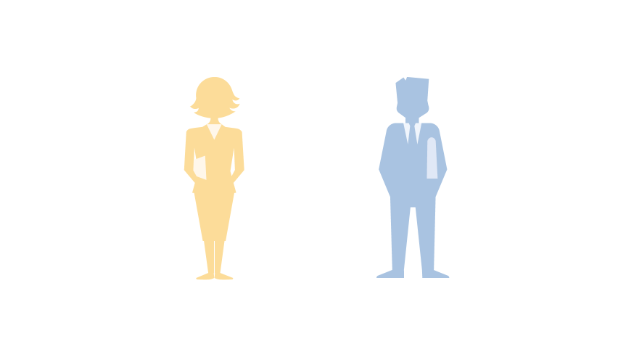

**Comienzo importando las bibliotecas** con alias, se utilizarán bibliotecas para análisis estadístico, *pandas* para manejo de datos y *altair* para visualización de los mismos

In [ ]:
##Importación de bibliotecas
import statistics

import pandas as pd
import numpy as np

import altair as alt

###Carga de los datos

In [ ]:
##Obtención de los datos del primer set, referente a la brecha salarial
!wget https://www.inegi.org.mx/contenidos/datosgob/tdr05_brecha_hom_muj.csv

--2020-10-03 04:39:34--  https://www.inegi.org.mx/contenidos/datosgob/tdr05_brecha_hom_muj.csv
Resolving www.inegi.org.mx (www.inegi.org.mx)... 200.23.8.5, 200.33.109.5
Connecting to www.inegi.org.mx (www.inegi.org.mx)|200.23.8.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5790 (5.7K) [application/octet-stream]
Saving to: ‘tdr05_brecha_hom_muj.csv.1’

tdr05_brecha_hom_mu 100%[===================>]   5.65K  --.-KB/s    in 0s      

2020-10-03 04:39:34 (407 MB/s) - ‘tdr05_brecha_hom_muj.csv.1’ saved [5790/5790]



In [ ]:
##Lectura de los datos
brecha = '/content/tdr05_brecha_hom_muj.csv'

# Utilizamos la función de Pandas para cargar un archivo CSV
brecha_data = pd.read_csv(brecha, encoding='latin-1')

In [ ]:
##Datos de Brecha de género
brecha_data.head()

,Entidad federativa,Periodo,Trimestre,Brecha en el ingreso entre hombres y mujeres,Ingreso promedio por hora trabajada de la población ocupada de mujeres,Ingreso promedio por hora trabajada de la población ocupada de hombres
0,Estados Unidos Mexicanos,2014,4,-0.1,30.9,30.8
1,Aguascalientes,2014,4,-1.6,29.4,27.8
2,Baja California,2014,4,2.5,33.3,35.8
3,Baja California Sur,2014,4,4.7,45.3,50.0
4,Campeche,2014,4,-1.7,33.8,32.1


###Perfilamiento de los datos

In [ ]:
#Número de filas y columnas
print('Número de filas: {}'.format(brecha_data.shape[0]))
print('Número de columnas: {}'.format(brecha_data.shape[1]))

Número de filas: 165
Número de columnas: 6


In [ ]:
#Columnas en el set
brecha_data.columns

Index(['Entidad federativa', 'Periodo', 'Trimestre',
       'Brecha en el ingreso entre hombres y mujeres',
       'Ingreso promedio por hora trabajada de la población ocupada de mujeres',
       'Ingreso promedio por hora trabajada de la población ocupada de hombres'],
      dtype='object')

In [ ]:
##Limpieza de los datos
brecha_data.columns = brecha_data.columns.str.replace(' ', '_')
brecha_data.columns = brecha_data.columns.str.lower()
brecha_data.columns

Index(['entidad_federativa', 'periodo', 'trimestre',
       'brecha_en_el_ingreso_entre_hombres_y_mujeres',
       'ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_mujeres',
       'ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_hombres'],
      dtype='object')

In [ ]:
##Valores Nulos
for col in brecha_data.columns:
  print('Valores nulos en "{}": {}'.format(col,brecha_data[col].isna().sum()))

Valores nulos en "entidad_federativa": 0
Valores nulos en "periodo": 0
Valores nulos en "trimestre": 0
Valores nulos en "brecha_en_el_ingreso_entre_hombres_y_mujeres": 0
Valores nulos en "ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_mujeres": 0
Valores nulos en "ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_hombres": 0


In [ ]:
#Tipos de datos
brecha_data.dtypes

entidad_federativa                                                         object
periodo                                                                     int64
trimestre                                                                   int64
brecha_en_el_ingreso_entre_hombres_y_mujeres                              float64
ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_mujeres    float64
ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_hombres    float64
dtype: object

In [ ]:
##Volvemos a observar los datos
brecha_data.head()

,entidad_federativa,periodo,trimestre,brecha_en_el_ingreso_entre_hombres_y_mujeres,ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_mujeres,ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_hombres
0,Estados Unidos Mexicanos,2014,4,-0.1,30.9,30.8
1,Aguascalientes,2014,4,-1.6,29.4,27.8
2,Baja California,2014,4,2.5,33.3,35.8
3,Baja California Sur,2014,4,4.7,45.3,50.0
4,Campeche,2014,4,-1.7,33.8,32.1


In [ ]:
#Utilizo una nueva variable para acortar el nombre
brecha_data['brecha_ingreso'] = brecha_data.brecha_en_el_ingreso_entre_hombres_y_mujeres
brecha_data['ingresos_hombres'] = brecha_data.ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_hombres
brecha_data['ingresos_mujeres'] = brecha_data.ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_mujeres

###Descripción por tipo


In [ ]:
##Se clasifican los datos como categóricos o numéricos
numerical = brecha_data.select_dtypes(include='number')
categorical = brecha_data.select_dtypes(include=['object', 'bool', 'category', 'datetime64[ns]'])

In [ ]:
numerical.head()

,periodo,trimestre,brecha_en_el_ingreso_entre_hombres_y_mujeres,ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_mujeres,ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_hombres,brecha_ingreso,ingresos_hombres,ingresos_mujeres
0,2014,4,-0.1,30.9,30.8,-0.1,30.8,30.9
1,2014,4,-1.6,29.4,27.8,-1.6,27.8,29.4
2,2014,4,2.5,33.3,35.8,2.5,35.8,33.3
3,2014,4,4.7,45.3,50.0,4.7,50.0,45.3
4,2014,4,-1.7,33.8,32.1,-1.7,32.1,33.8


In [ ]:
categorical.head()

,entidad_federativa
0,Estados Unidos Mexicanos
1,Aguascalientes
2,Baja California
3,Baja California Sur
4,Campeche


In [ ]:
# para conocer todos los tipo de datos
?brecha_data.select_dtypes

In [ ]:
numerical.describe()

,periodo,trimestre,brecha_en_el_ingreso_entre_hombres_y_mujeres,ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_mujeres,ingreso_promedio_por_hora_trabajada_de_la_población_ocupada_de_hombres,brecha_ingreso,ingresos_hombres,ingresos_mujeres
count,165.000000,165.0,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,2016.000000,4.0,0.394545,34.552727,34.947273,0.394545,34.947273,34.552727
std,1.418519,0.0,2.578245,6.439177,7.221416,2.578245,7.221416,6.439177
min,2014.000000,4.0,-7.300000,23.800000,17.900000,-7.300000,17.900000,23.800000
25%,2015.000000,4.0,-1.300000,30.000000,29.600000,-1.300000,29.600000,30.000000
50%,2016.000000,4.0,0.400000,34.100000,33.800000,0.400000,33.800000,34.100000
75%,2017.000000,4.0,2.000000,38.400000,39.300000,2.000000,39.300000,38.400000
max,2018.000000,4.0,7.600000,55.500000,56.800000,7.600000,56.800000,55.500000


###Análisis de los datos

Se busca conocer si en promedio la diferencia ha ido disminuyendo con el paso del tiempo, la diferencia entre entidades federativas y compararla con la información más actual (2018).

In [ ]:
## Cambio en el ingreso a través del tiempo
brecha_data.groupby('periodo').brecha_ingreso.describe()


,count,mean,std,min,25%,50%,75%,max
periodo,,,,,,,,
2014,33.0,0.157576,2.297693,-6.1,-1.2,0.1,1.6,5.0
2015,33.0,0.036364,2.648209,-5.7,-1.7,-0.1,1.9,5.7
2016,33.0,0.651515,2.541053,-5.4,-0.6,0.6,3.0,5.1
2017,33.0,0.690909,2.757984,-7.3,-1.3,1.1,1.9,7.6
2018,33.0,0.436364,2.713141,-7.1,-0.6,0.5,1.4,6.3


> Nos damos cuenta de cómo a través del tiempo la diferencia parece no tener una tendencia. Los datos no son suficientes para inferir que hay un incremento o decremento, sin embargo, en comparación con el año 2017, el 2018 parece ser mucho más favorable para las mujeres.

In [ ]:
## Promedio de ingresos de las mujeres por estado
brecha_data.groupby('entidad_federativa').ingresos_mujeres.mean().sort_values()

entidad_federativa
Morelos                            26.24
Tlaxcala                           26.70
Chiapas                            26.88
Puebla                             26.92
Guerrero                           26.96
Oaxaca                             27.02
Veracruz de Ignacio de la Llave    28.56
México                             29.84
Hidalgo                            30.54
Michoacán de Ocampo                31.46
Guanajuato                         31.50
Yucatán                            32.12
Durango                            32.70
Aguascalientes                     32.98
Querétaro                          33.42
Zacatecas                          34.14
Estados Unidos Mexicanos           34.16
San Luis Potosí                    34.30
Campeche                           34.88
Jalisco                            35.18
Nayarit                            35.34
Tabasco                            35.52
Tamaulipas                         36.98
Quintana Roo                       37.

> Con esta consulta, sabemos que los ingresos son más altos en Baja California Sur y en Morelos es donde las mujeres perciben menos

In [ ]:
## Promedio de ingresos de los hombres por estado
brecha_data.groupby('entidad_federativa').ingresos_hombres.mean().sort_values()

entidad_federativa
Chiapas                            20.74
Morelos                            27.16
Oaxaca                             27.18
Puebla                             27.76
Tlaxcala                           28.12
Veracruz de Ignacio de la Llave    28.36
Guerrero                           29.08
Hidalgo                            29.94
Zacatecas                          30.78
México                             31.02
Aguascalientes                     31.42
Tabasco                            31.62
San Luis Potosí                    31.78
Durango                            31.90
Guanajuato                         31.92
Yucatán                            32.92
Campeche                           33.38
Michoacán de Ocampo                34.04
Estados Unidos Mexicanos           34.40
Querétaro                          35.56
Tamaulipas                         37.72
Nayarit                            37.78
Quintana Roo                       38.22
Jalisco                            39.

>Con esta consulta, sabemos que los ingresos son más altos en Baja California Sur y en Morelos es donde las mujeres perciben menos

In [ ]:
## Promedio por entidad federativa
lugares = brecha_data.groupby('entidad_federativa').brecha_ingreso.mean()
Consulta1 =lugares.sort_values()
lugares.sort_values()

entidad_federativa
Chiapas                           -6.14
Tabasco                           -3.90
Zacatecas                         -3.36
San Luis Potosí                   -2.52
Aguascalientes                    -1.56
Campeche                          -1.50
Durango                           -0.80
Hidalgo                           -0.60
Nuevo León                        -0.36
Veracruz de Ignacio de la Llave   -0.20
Sonora                             0.08
Oaxaca                             0.16
Estados Unidos Mexicanos           0.24
Sinaloa                            0.28
Quintana Roo                       0.40
Guanajuato                         0.42
Coahuila de Zaragoza               0.58
Tamaulipas                         0.74
Yucatán                            0.80
Puebla                             0.84
Morelos                            0.92
Ciudad de México                   1.06
México                             1.18
Tlaxcala                           1.42
Guerrero             

>Promedio por entidad federativa de la brecha salarial, entre más alejado del 0 están los números, más grande es la brecha salarial, para números superiores a 0, es favorecedor para los hombres, mientras que números menores a 0 son favorecedores para las mujeres

In [ ]:
## En 2018, diferencia en el último año, ordenada
brecha_actual = brecha_data.query('periodo =="2018"')
Consulta2= brecha_actual.groupby('entidad_federativa').brecha_ingreso.mean().sort_values()
Consulta2

entidad_federativa
Chiapas                           -7.1
Tabasco                           -5.0
Chihuahua                         -3.1
Aguascalientes                    -2.8
San Luis Potosí                   -1.9
Sonora                            -1.7
Zacatecas                         -1.7
Campeche                          -1.0
Veracruz de Ignacio de la Llave   -0.6
Durango                           -0.6
Tamaulipas                        -0.3
Hidalgo                           -0.3
Morelos                            0.0
Estados Unidos Mexicanos           0.3
Quintana Roo                       0.3
Yucatán                            0.4
Nuevo León                         0.5
Baja California                    0.7
Coahuila de Zaragoza               0.9
México                             1.0
Sinaloa                            1.0
Baja California Sur                1.3
Colima                             1.3
Ciudad de México                   1.4
Tlaxcala                           1.4
Oaxaca

> Con estos resultados podemos hacer una comparativa del estado más actual de la brecha respecto al promedio del 2014 al 2018

In [ ]:
# Gráfica del promedio de la brecha
datos = brecha_data
titulo_grafico = "Brecha en los ingresos de hombres y mujeres por entidad federativa"
graf=alt.Chart(datos).mark_bar(color = 'pink').encode(
    x = alt.X("entidad_federativa:N", title="Entidad Federativa"),
    y = alt.Y("mean(brecha_ingreso):Q", title = "Diferencia de ingresos (promedio)")
).properties(
    title = titulo_grafico,
    width = 750,
    height = 300
)

etiquetas = alt.Chart(datos).mark_text(color = 'black').encode(
    x = alt.X("entidad_federativa:N"),
    y = alt.Y("mean(brecha_ingreso):Q"),
    text = alt.Text("mean(brecha_ingreso):Q", )
)

grafica_brecha = graf+etiquetas
grafica_brecha

alt.LayerChart(...)

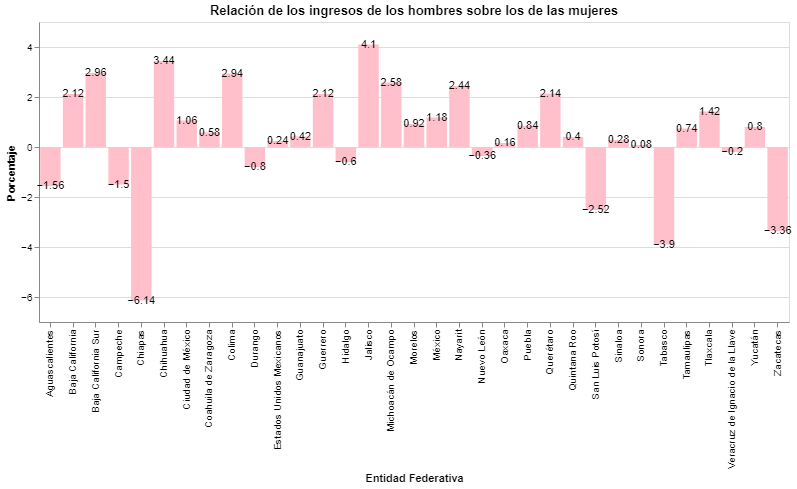

>Con la gráfica anterior nos queda más claro lo lejos que estamos del cero

In [ ]:
#Gráfica del promedio de ingresos de hombres y mujeres

titulo_grafico2 = "Ingresos promedio de hombres y mujeres"
grafM=alt.Chart(datos).mark_bar(color = 'pink', fillOpacity=.5).encode(
    x = alt.X("entidad_federativa:N", title="Entidad Federativa"),
    y = alt.Y("mean(ingresos_mujeres):Q", title = "Ingresos promedio por hora")
).properties(
    title = titulo_grafico2,
    width = 750,
    height = 300
)

grafH=alt.Chart(datos).mark_bar(color = 'blue', fillOpacity=.3).encode(
    x = alt.X("entidad_federativa:N", title="Entidad Federativa"),
    y = alt.Y("mean(ingresos_hombres):Q", title = "Ingresos promedio por hora")
).properties(
    title = titulo_grafico2,
    width = 750,
    height = 300
)

grafica2 = grafH + grafM
grafica2

alt.LayerChart(...)

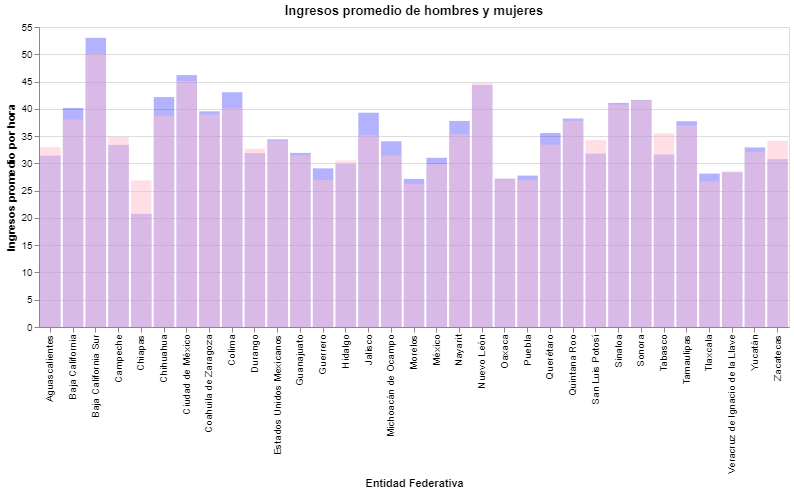

>Idealmente, estas gráficas debieran ser moradas en su totalidas, sin embargo, es notorio como la mayor parte tiene puntas azules, aún así existen otras barras con puntas rosadas

Hasta ahora, simplemente identificamos lugares donde hombres o mujeres ganan más, pero a la hora de conseguir un trabajo importan también las oportunidades de prestaciones.

## Set con información sobre prestaciones laborales
El otro documento csv del que se obtuvo información pertenece igualmente al INEGI y nos ayudará a complementar la información obtenida anteriormente.

In [ ]:
!wget https://www.inegi.org.mx/contenidos/datosgob/tdr03_muj_ocup_prest_lab.csv
nom_archivo = '/content/tdr03_muj_ocup_prest_lab.csv'

prestaciones = pd.read_csv(nom_archivo, encoding='latin-1')
prestaciones.head()

--2020-10-03 04:41:01--  https://www.inegi.org.mx/contenidos/datosgob/tdr03_muj_ocup_prest_lab.csv
Resolving www.inegi.org.mx (www.inegi.org.mx)... 200.33.109.5, 200.23.8.5
Connecting to www.inegi.org.mx (www.inegi.org.mx)|200.33.109.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12019 (12K) [application/octet-stream]
Saving to: ‘tdr03_muj_ocup_prest_lab.csv.2’

tdr03_muj_ocup_pres 100%[===================>]  11.74K  --.-KB/s    in 0s      

2020-10-03 04:41:02 (116 MB/s) - ‘tdr03_muj_ocup_prest_lab.csv.2’ saved [12019/12019]



,Entidad federativa,Año,Trimestre,Porcentaje de mujeres ocupadas con prestaciones laborales,Población femenina Ocupada. Total,Población femenina Ocupada con prestaciones laborales. Total
0,Estados Unidos Mexicanos,2010,4,42.94,17143259,7361181
1,Aguascalientes,2010,4,54.17,175816,95248
2,Baja California,2010,4,56.99,512743,292225
3,Baja California Sur,2010,4,51.94,110071,57173
4,Campeche,2010,4,42.28,128589,54361


###Perfilamiento y limpieza

In [ ]:
print('Número de filas: {}'.format(prestaciones.shape[0]))
print('Número de columnas: {}'.format(prestaciones.shape[1]))

Número de filas: 297
Número de columnas: 6


In [ ]:
#Columnas
prestaciones.columns

Index(['Entidad federativa', 'Año', 'Trimestre',
       'Porcentaje de mujeres ocupadas con prestaciones laborales',
       'Población femenina Ocupada. Total',
       'Población femenina Ocupada con prestaciones laborales. Total'],
      dtype='object')

In [ ]:
##Limpieza de los datos
prestaciones.columns = prestaciones.columns.str.replace(' ', '_')
prestaciones.columns = prestaciones.columns.str.replace('ó', 'o')
prestaciones.columns = prestaciones.columns.str.replace('.', '')
prestaciones.columns = prestaciones.columns.str.replace('ñ','n')
prestaciones.columns = prestaciones.columns.str.lower()
prestaciones.columns

Index(['entidad_federativa', 'ano', 'trimestre',
       'porcentaje_de_mujeres_ocupadas_con_prestaciones_laborales',
       'poblacion_femenina_ocupada_total',
       'poblacion_femenina_ocupada_con_prestaciones_laborales_total'],
      dtype='object')

In [ ]:
##Valores Nulos
for col in prestaciones.columns:
  print('Valores nulos en "{}": {}'.format(col,prestaciones[col].isna().sum()))

Valores nulos en "entidad_federativa": 0
Valores nulos en "ano": 0
Valores nulos en "trimestre": 0
Valores nulos en "porcentaje_de_mujeres_ocupadas_con_prestaciones_laborales": 0
Valores nulos en "poblacion_femenina_ocupada_total": 0
Valores nulos en "poblacion_femenina_ocupada_con_prestaciones_laborales_total": 0


In [ ]:
#Tipos de datos
prestaciones.dtypes

entidad_federativa                                              object
ano                                                              int64
trimestre                                                        int64
porcentaje_de_mujeres_ocupadas_con_prestaciones_laborales      float64
poblacion_femenina_ocupada_total                                 int64
poblacion_femenina_ocupada_con_prestaciones_laborales_total      int64
dtype: object

In [ ]:
##Volvemos a observar los datos
prestaciones.head()

,entidad_federativa,ano,trimestre,porcentaje_de_mujeres_ocupadas_con_prestaciones_laborales,poblacion_femenina_ocupada_total,poblacion_femenina_ocupada_con_prestaciones_laborales_total
0,Estados Unidos Mexicanos,2010,4,42.94,17143259,7361181
1,Aguascalientes,2010,4,54.17,175816,95248
2,Baja California,2010,4,56.99,512743,292225
3,Baja California Sur,2010,4,51.94,110071,57173
4,Campeche,2010,4,42.28,128589,54361


In [ ]:
##Acorto los nombres con otras variables
prestaciones['porcentaje'] = prestaciones.porcentaje_de_mujeres_ocupadas_con_prestaciones_laborales
prestaciones['ocupada_total'] = prestaciones.poblacion_femenina_ocupada_total
prestaciones['ocupada_prestaciones'] = prestaciones.poblacion_femenina_ocupada_con_prestaciones_laborales_total

###Descripción por tipo de dato

In [ ]:
## Se clasifican los datos en numéricos y categóricos
numerical2 = prestaciones.select_dtypes(include='number')
categorical2 = prestaciones.select_dtypes(include=['object', 'bool', 'category', 'datetime64[ns]'])

In [ ]:
numerical2.head()

,ano,trimestre,porcentaje_de_mujeres_ocupadas_con_prestaciones_laborales,poblacion_femenina_ocupada_total,poblacion_femenina_ocupada_con_prestaciones_laborales_total,porcentaje,ocupada_total,ocupada_prestaciones
0,2010,4,42.94,17143259,7361181,42.94,17143259,7361181
1,2010,4,54.17,175816,95248,54.17,175816,95248
2,2010,4,56.99,512743,292225,56.99,512743,292225
3,2010,4,51.94,110071,57173,51.94,110071,57173
4,2010,4,42.28,128589,54361,42.28,128589,54361


In [ ]:
categorical2.head()

,entidad_federativa
0,Estados Unidos Mexicanos
1,Aguascalientes
2,Baja California
3,Baja California Sur
4,Campeche


In [ ]:
# para conocer todos los tipo de datos
?prestaciones.select_dtypes

In [ ]:
numerical2.describe()

,ano,trimestre,porcentaje_de_mujeres_ocupadas_con_prestaciones_laborales,poblacion_femenina_ocupada_total,poblacion_femenina_ocupada_con_prestaciones_laborales_total,porcentaje,ocupada_total,ocupada_prestaciones
count,297.000000,297.0,297.000000,2.970000e+02,2.970000e+02,297.000000,2.970000e+02,2.970000e+02
mean,2014.000000,4.0,43.949428,1.166558e+06,5.099601e+05,43.949428,1.166558e+06,5.099601e+05
std,2.586347,0.0,12.089843,3.248086e+06,1.424658e+06,12.089843,3.248086e+06,1.424658e+06
min,2010.000000,4.0,17.430000,1.100710e+05,5.059700e+04,17.430000,1.100710e+05,5.059700e+04
25%,2012.000000,4.0,34.010000,2.740190e+05,1.124690e+05,34.010000,2.740190e+05,1.124690e+05
50%,2014.000000,4.0,43.830000,4.885690e+05,1.671900e+05,43.830000,4.885690e+05,1.671900e+05
75%,2016.000000,4.0,53.430000,7.199360e+05,3.357430e+05,53.430000,7.199360e+05,3.357430e+05
max,2018.000000,4.0,67.910000,2.090806e+07,9.392031e+06,67.910000,2.090806e+07,9.392031e+06


###Análisis

In [ ]:
## Cambio en el ingreso a través del tiempo
prestaciones.groupby('ano').porcentaje.describe()

,count,mean,std,min,25%,50%,75%,max
ano,,,,,,,,
2010,33.0,43.147273,10.840483,20.55,35.40,42.94,51.94,62.38
2011,33.0,41.710000,10.969354,19.31,33.53,41.81,50.12,59.55
2012,33.0,43.439697,11.320932,19.24,34.59,43.03,52.82,61.03
2013,33.0,43.062727,11.718370,18.91,34.68,42.28,52.19,61.83
2014,33.0,44.657576,12.627401,20.45,34.70,44.03,54.92,65.54
2015,33.0,43.790606,12.542556,18.05,33.51,44.09,52.50,63.65
2016,33.0,45.090000,12.543922,17.84,35.58,47.05,53.75,64.27
2017,33.0,45.230303,13.316017,19.47,35.12,45.91,55.18,67.91
2018,33.0,45.416667,13.584891,17.43,32.23,46.35,55.58,67.08


>Con mayor cantidad de datos, podemos observar que la variación es poca, el promedio desde 2010 se mantiene entre 43 y 46 porciento. Lo que quiere decir que, a grandes razgos, las mujeres, aunque tengan trabajo, en más de la mitad de los casos no cuentan con prestaciones laborales.

In [ ]:
#Promedio del porcentaje por entidad federativa
prestaciones.groupby('entidad_federativa').porcentaje.mean().sort_values()

entidad_federativa
Oaxaca                             19.027778
Guerrero                           22.381111
Puebla                             25.531111
Chiapas                            28.216667
Michoacán de Ocampo                28.378889
Tlaxcala                           29.004444
Hidalgo                            30.452222
Veracruz de Ignacio de la Llave    33.084444
Morelos                            33.587778
México                             40.424444
Zacatecas                          41.078889
Tabasco                            41.317778
Campeche                           41.371111
Nayarit                            41.586667
San Luis Potosí                    42.577778
Estados Unidos Mexicanos           43.668889
Yucatán                            43.874444
Colima                             43.962222
Durango                            47.263333
Guanajuato                         47.832222
Jalisco                            50.898889
Sinaloa                            5

>En este punto nos damos cuenta de que las prestaciones laborales en Oaxaca son muy pocas, mientras que en Chihuahua, Nuevo León y Coahuila son un poco más altas sin llegar a ser mucho más que la mitad.

In [ ]:
# De acuerdo a la información más actual, ¿hay cambio?
prestaciones.query('ano == "2018"').groupby('entidad_federativa').porcentaje.mean().sort_values()

entidad_federativa
Oaxaca                             17.43
Guerrero                           21.25
Puebla                             25.80
Hidalgo                            26.73
Michoacán de Ocampo                28.96
Tlaxcala                           29.35
Chiapas                            30.58
Veracruz de Ignacio de la Llave    31.36
Morelos                            32.23
México                             38.98
Tabasco                            40.12
Campeche                           41.31
Nayarit                            42.53
Yucatán                            43.12
Estados Unidos Mexicanos           44.92
Zacatecas                          45.47
San Luis Potosí                    46.35
Colima                             46.35
Durango                            52.93
Guanajuato                         53.02
Querétaro                          53.27
Ciudad de México                   53.76
Jalisco                            54.01
Quintana Roo                       54.

>Afortunadamente existe un aumento en las entidades con mejores oportunidades de prestaciones laborales, aunque en Oaxaca, el que posee peor puntuación, las oportunidades están por debajo del promedio.

In [ ]:
# Gráfica contrastante
datos3 = prestaciones.query('entidad_federativa != "Estados Unidos Mexicanos"')
titulo_grafico = "Porcentaje de mujeres ocupadas con prestaciones laborales"
grafP=alt.Chart(datos3).mark_bar(color = 'purple', fillOpacity=.6).encode(
    x = alt.X("entidad_federativa:N", title="Entidad Federativa"),
    y = alt.Y("mean(porcentaje):Q", title = "Porcentaje")
).properties(
    title = titulo_grafico,
    width = 750,
    height = 300
)

grafT = alt.Chart(datos3).mark_bar(color = 'green', fillOpacity=.6).encode(
    x = alt.X("entidad_federativa:N",  title="Entidad Federativa"),
    y = alt.Y("mean(ocupada_total):Q",  title="Mujeres Ocupadas")
).properties(
    width = 750,
    height = 300
)

grafR = alt.Chart(datos3).mark_bar(color = 'orange', fillOpacity=.6).encode(
    x = alt.X("entidad_federativa:N",  title="Entidad Federativa"),
    y = alt.Y("mean(ocupada_prestaciones):Q",  title="Mujeres Ocupadas con prestaciones")
).properties(
    width = 750,
    height = 300
)

graficaContraste = grafT+grafR.properties(title = "Contraste")
graficaTotal = alt.vconcat(grafP, grafR, grafT)
alt.vconcat(graficaTotal, graficaContraste)

alt.VConcatChart(...)

>La diferencia es extremadamente notoria

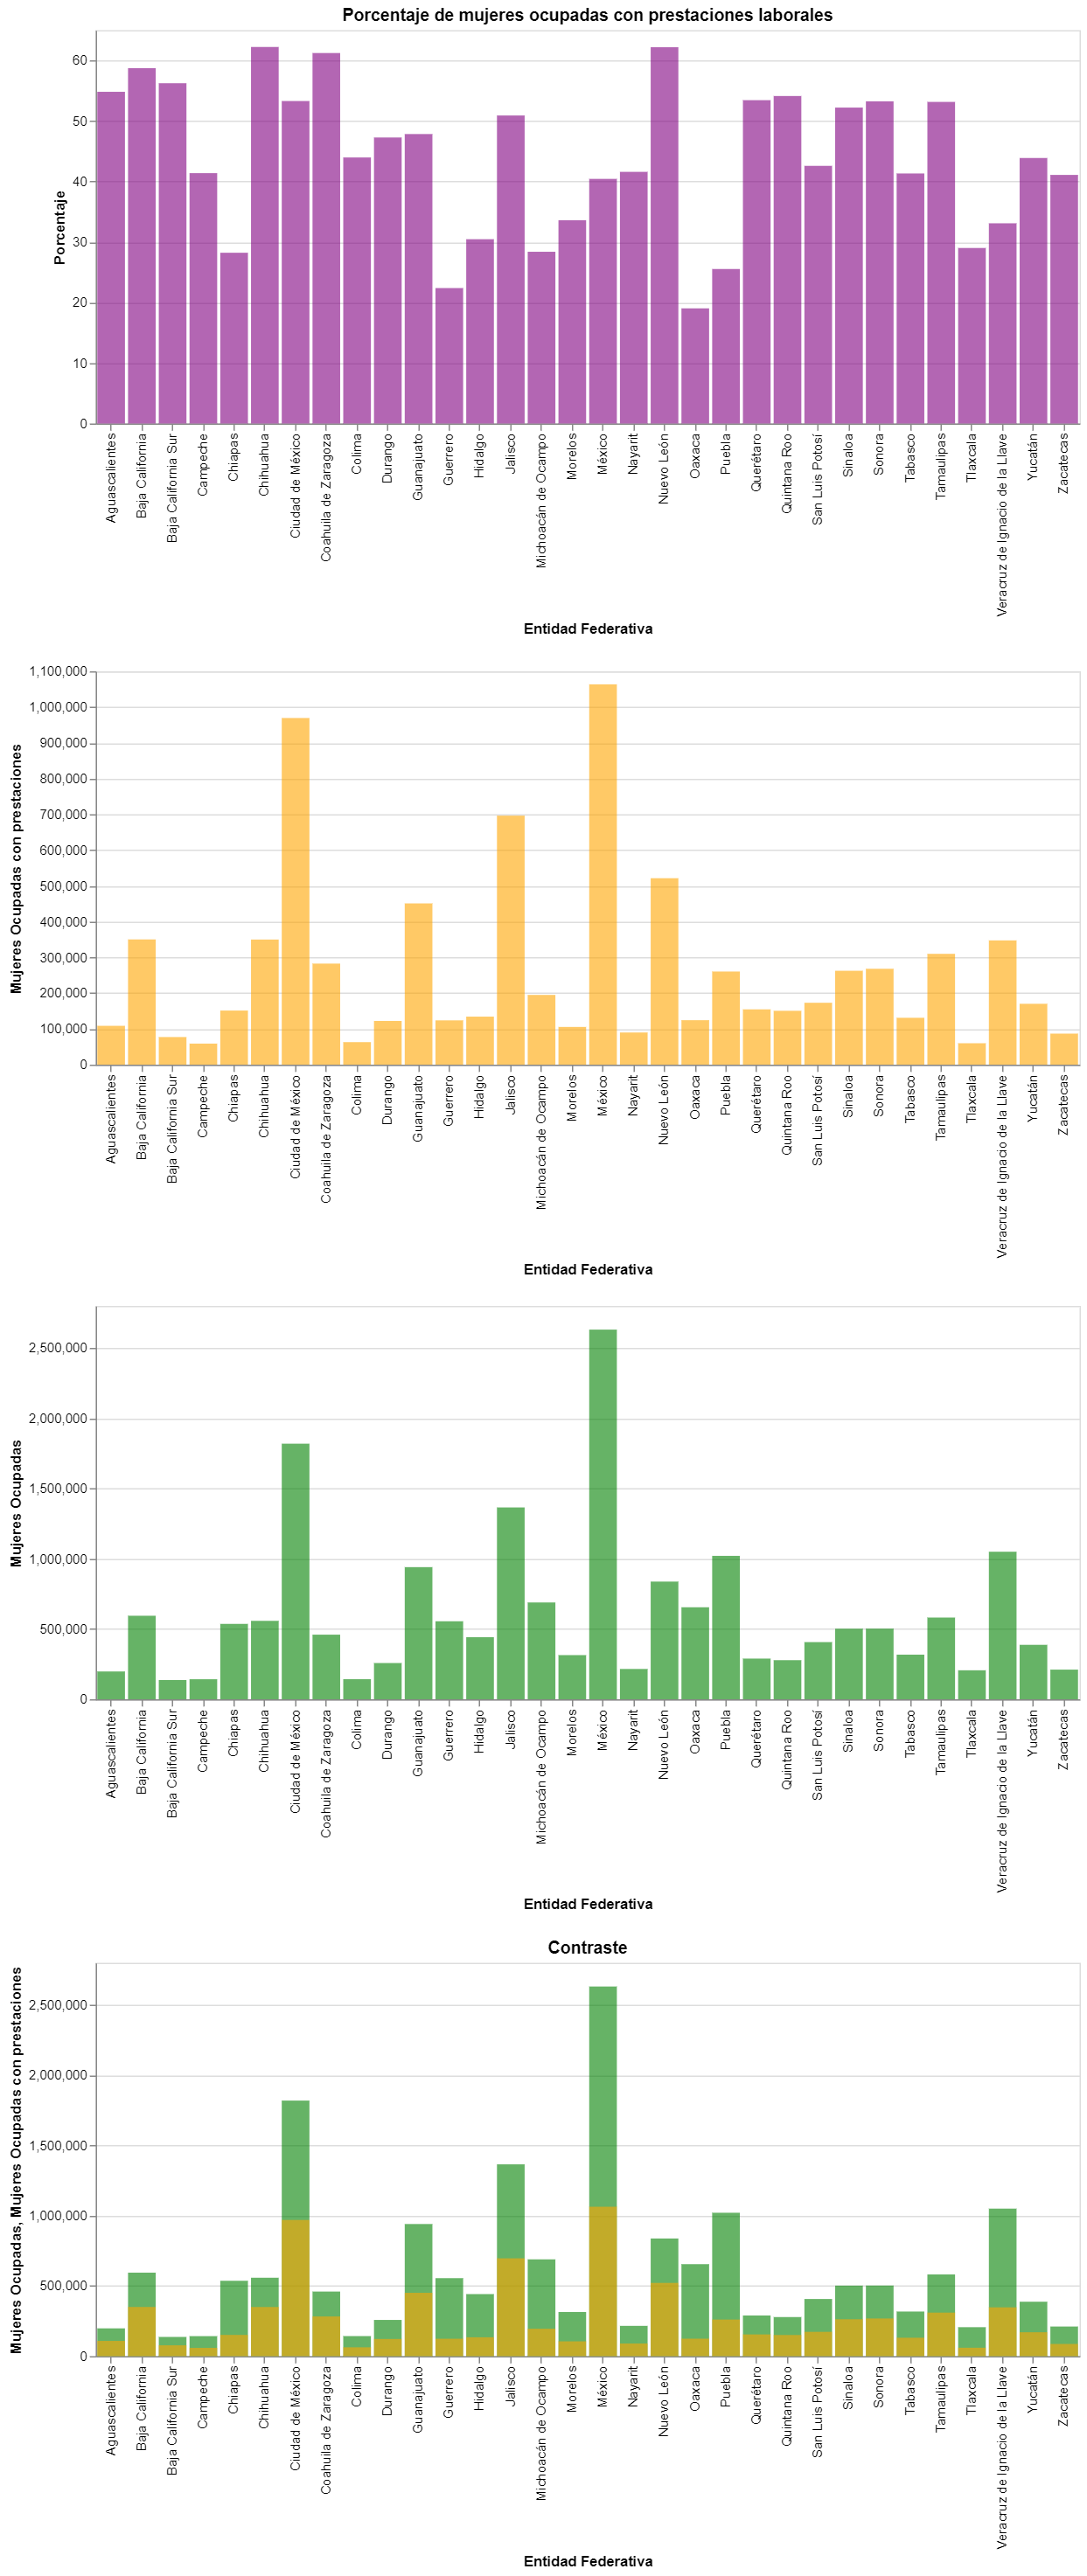

##Conclusiones

*   A pesar de que las mujeres parecen ganar más en algunos estados o entidades federativas, con la información de las prestaciones laborales, se evidencía que estos son lugares donde las prestaciones las tienen menos del 30% de las mujeres, además influiría la relación de existencia entre hombres y mujeres para poder decir que en dichos estados les va bien, lo cual no es cierto.
*   En entidades más hacia el norte, como Nuevo León, Coahuila y Chihuahua, las prestaciones dan mejores oportunidades, pero son también lugares donde los hombres suelen percibir mayores ingresos que las mujeres.
*   De manera general, en México las prestaciones laborales no parecen ser muy favorecedoras, al menos para las mujeres.
*   El cambio en el tiempo parece no ser un factor para poder cerrar la brecha, ya que no se identifica una tendencia.
*   Las mujeres no requieren únicamente ganar lo mismo, sino que hace falta de más oportunidades de trabajo con prestaciones laborales y eso es independientemente de la igualdad de género, pues en el país parece no ser mayor al 50%.
*   Estados más hacia el sur son aquéllos donde "Las mujeres ganan más que los hombres", pero también es donde hay menos prestaciones. Es importante considerar además, que es de estos estados de donde se estima hay más emigraciones, por lo que tiene sentido que las mujeres ganen más (hay más).






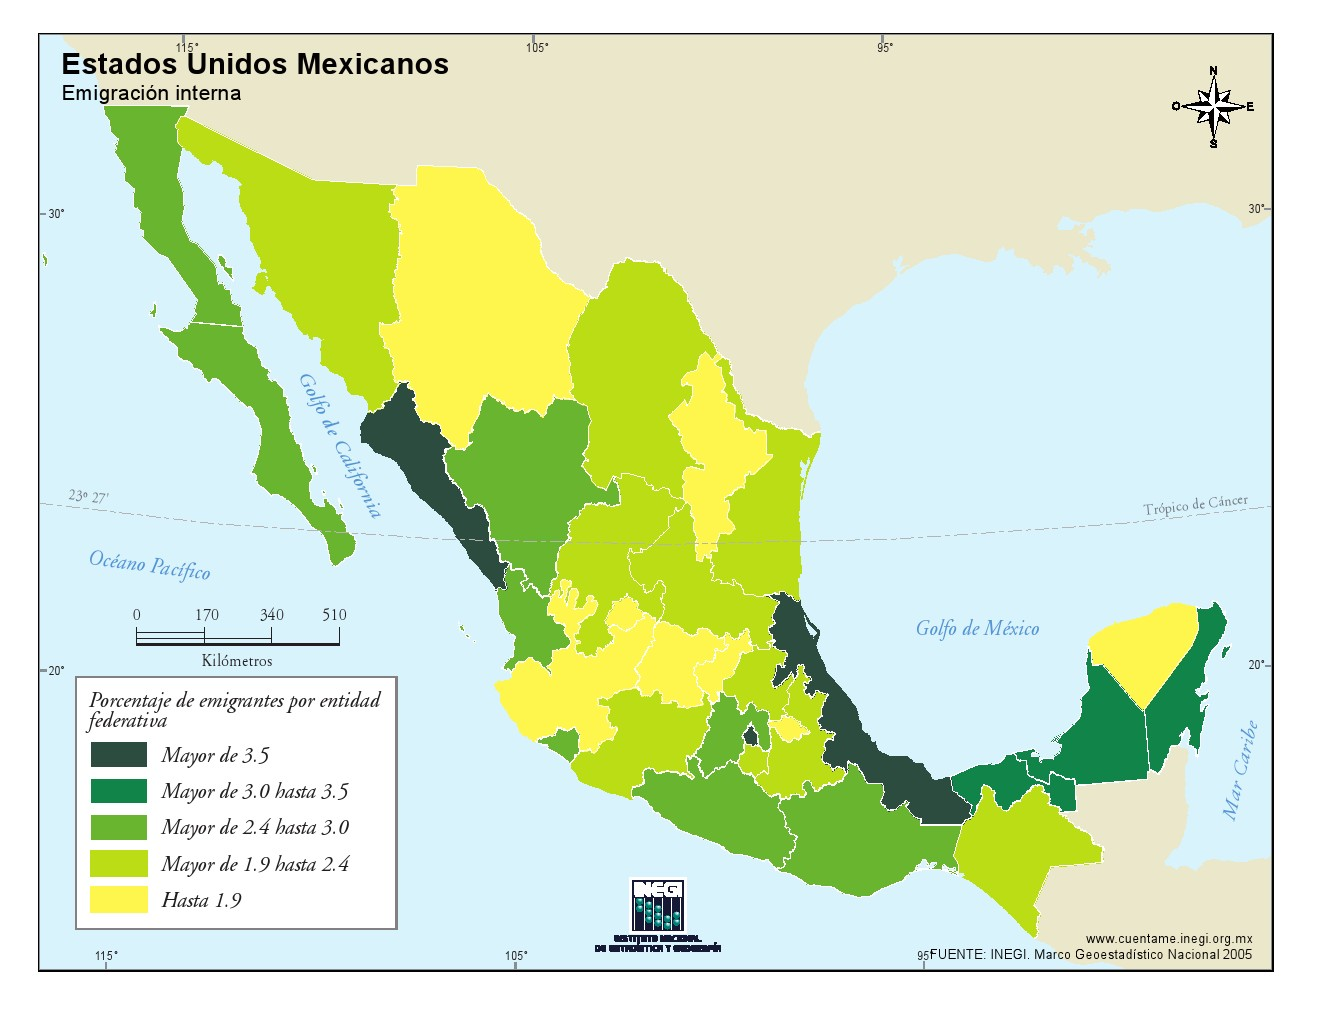

##Referencias



*   https://www.inegi.org.mx/contenidos/datosgob/tdr03_muj_ocup_prest_lab.csv
*   https://www.inegi.org.mx/contenidos/datosgob/tdr05_brecha_hom_muj.csv
